<a href="https://colab.research.google.com/github/b04201025/math.ai.hw/blob/master/hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data


In [7]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import mnist

In [0]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [5]:
x_train[520].shape

(28, 28)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [12]:
y_train[520]

9

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train[520]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
x_train = x_train/255
x_test = x_test/255

# Build Model

In [0]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adam

In [19]:
model = Sequential()
#first layer
model.add(Conv2D(16, (5, 5), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#second layer
model.add(Conv2D(32, (4, 4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#thied layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(40))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss="binary_crossentropy",
              optimizer=Adam(lr = 0.001, decay=1e-6),
              metrics=['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
__________

In [26]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0428 - acc: 0.9852
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0120 - acc: 0.9959
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0082 - acc: 0.9973
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0068 - acc: 0.9977
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0052 - acc: 0.9982
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0045 - acc: 0.9985
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0039 - acc: 0.9987
Epoch 8/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0034 - acc: 0.9988
Epoch 9/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0027 - acc: 0.9991
Epoch 10/10
60000/60000 [==========================

# Result

In [27]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 1s 64us/step
loss: 0.004728173609999431
正確率 0.9983399963378906


# Plot the Structure

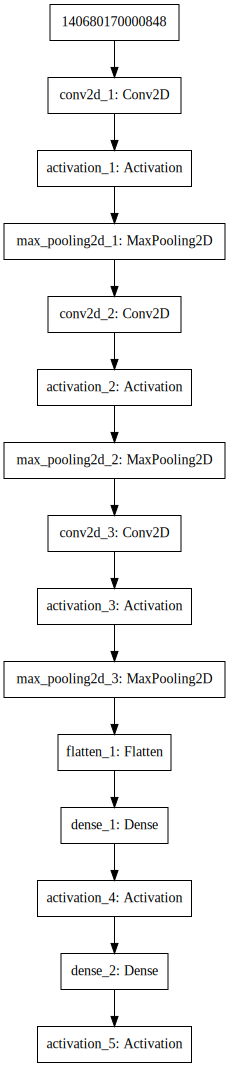

In [28]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))